In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Data preprocessing:

In [108]:
data = pd.read_csv('first inten project.csv')

In [109]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [48]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [110]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data.drop(columns=['Booking_ID'], inplace=True)

In [102]:
data.dtypes

,0
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
type of meal,object
car parking space,int64
room type,object
lead time,float64
market segment type,object
repeated,int64


In [111]:
data = data.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

In [112]:
data['booking status'] = data['booking status'].str.strip()

data['booking_status--converted'] = data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})


# Outlier detection and treatment

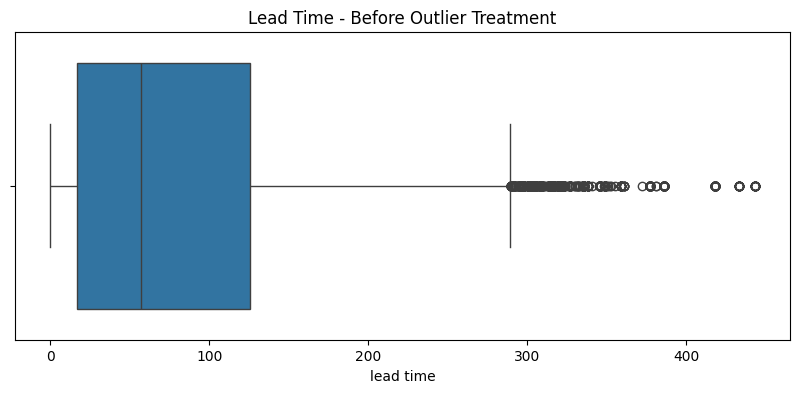

In [52]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['lead time'])
plt.title("Lead Time - Before Outlier Treatment")
plt.show()

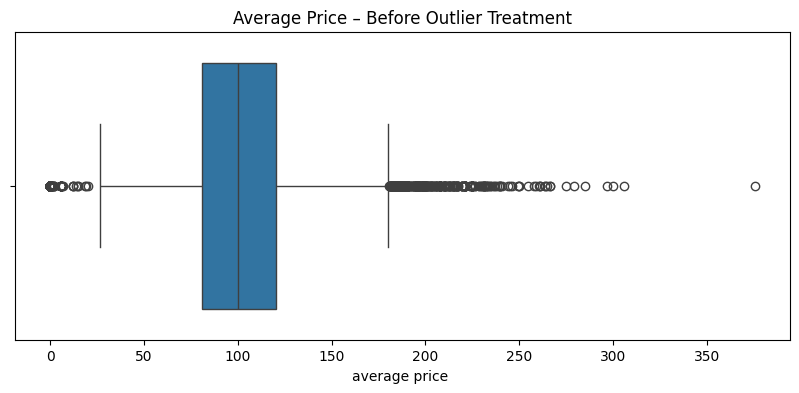

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['average price '])
plt.title("Average Price – Before Outlier Treatment")
plt.show()

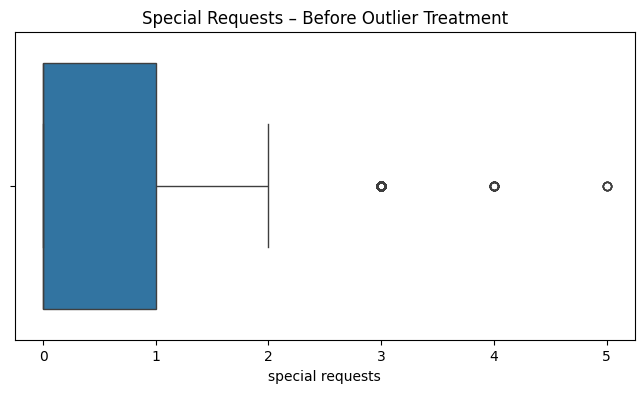

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['special requests'])
plt.title("Special Requests – Before Outlier Treatment")
plt.show()


In [53]:
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    print(f"{column}: clipped to range {lower:.2f} - {upper:.2f}")


In [54]:
clip_outliers_iqr(data, 'lead time')
clip_outliers_iqr(data, 'average price ')
clip_outliers_iqr(data, 'special requests')

lead time: clipped to range -146.50 - 289.50
average price : clipped to range 20.75 - 179.55
special requests: clipped to range -1.50 - 2.50


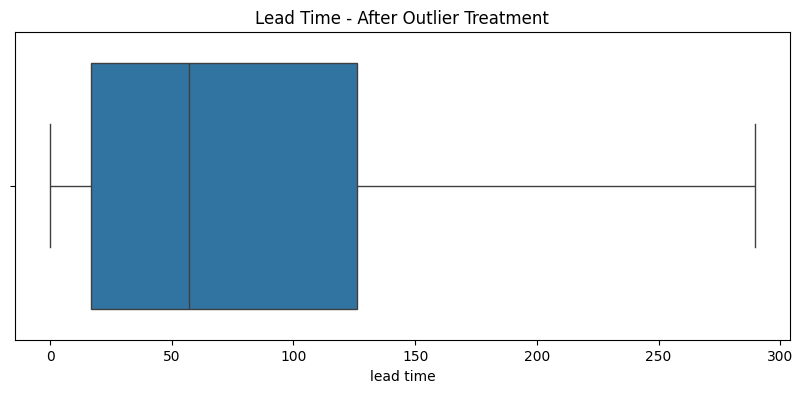

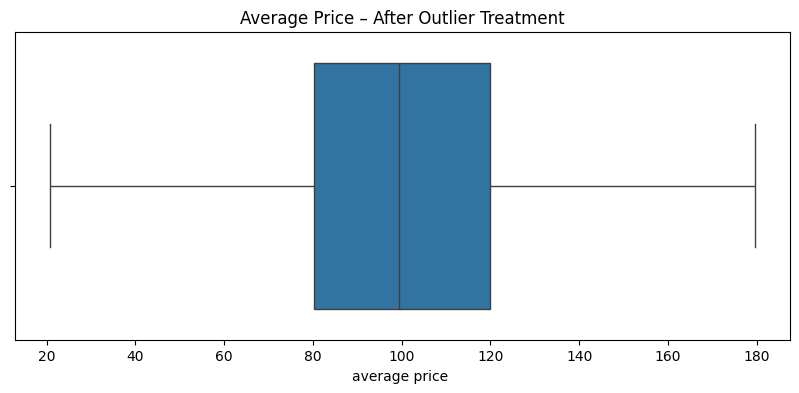

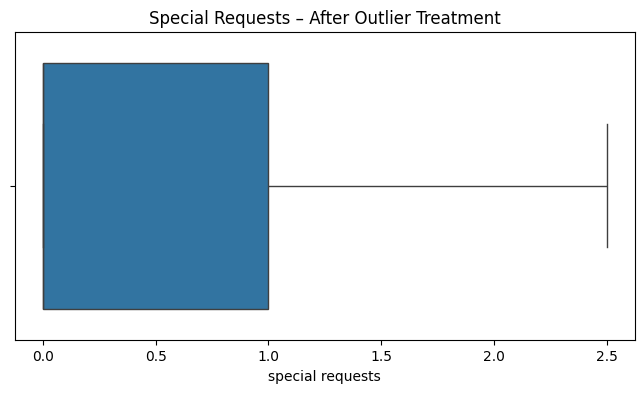

In [55]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['lead time'])
plt.title("Lead Time - After Outlier Treatment")
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['average price '])
plt.title("Average Price – After Outlier Treatment")
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['special requests'])
plt.title("Special Requests – After Outlier Treatment")
plt.show()


# Feature Engineering

In [113]:
data['total_nights'] = data['number of weekend nights'] + data['number of week nights']

In [114]:
data['total_guests'] = data['number of adults'] + data['number of children']

In [115]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,booking_status--converted,total_nights,total_guests
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,0,7,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,0,4,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,1,4,3
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,1,2,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,1,3,1


# Encode Categorical Variables

In [116]:
data_encoded = pd.get_dummies(
    data,
    columns=['type of meal', 'room type', 'market segment type'],
    drop_first=True,
    dtype=int
)

In [117]:
data['type of meal'] = data['type of meal'].astype(str).str.strip()
data['room type'] = data['room type'].astype(str).str.strip()
data['market segment type'] = data['market segment type'].astype(str).str.strip()

In [118]:
data_encoded.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,0,50.00,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,0,0,0,0,0,0,1


In [120]:
X = data_encoded.drop(columns=[ 'booking status', 'booking_status--converted', 'date of reservation'])
y = data_encoded['booking_status--converted']

# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Multicollinearity

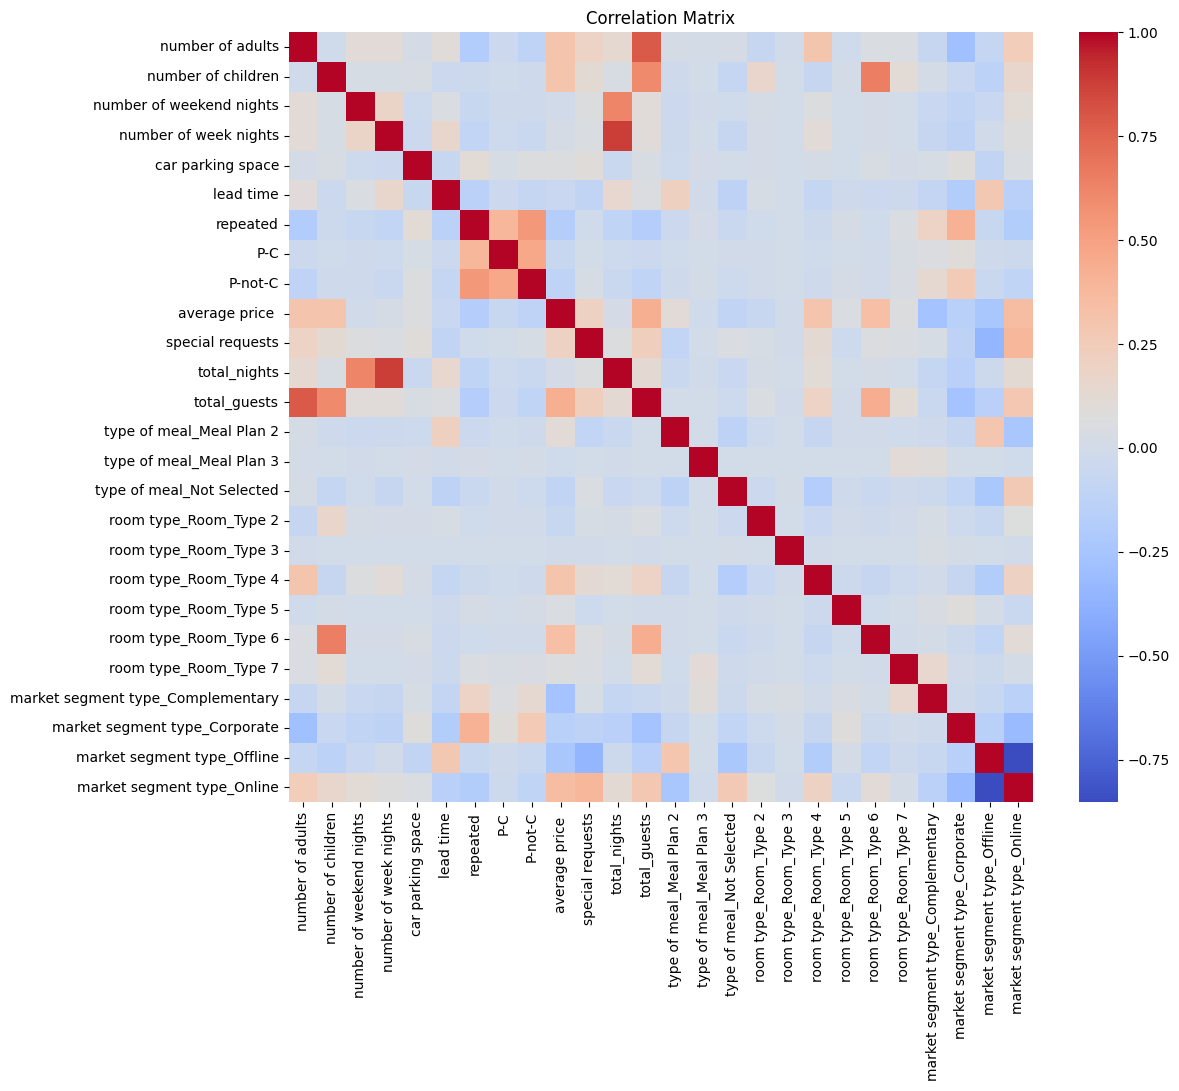

In [ ]:
corr_matrix = data_numeric.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [122]:
data_encoded.drop(columns=[
    'number of adults',
    'number of children',
    'number of weekend nights',
    'number of week nights'
], inplace=True)

data_encoded.drop(columns=['P-not-C'], inplace=True)

# Modeling And Accuracy Calculation

**knn model**

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [69]:
y_pred = knn.predict(X_test_scaled)

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8498001929171835
Confusion Matrix:
 [[4413  466]
 [ 624 1754]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4879
           1       0.79      0.74      0.76      2378

    accuracy                           0.85      7257
   macro avg       0.83      0.82      0.83      7257
weighted avg       0.85      0.85      0.85      7257



**Linear Regression**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R² Score:", r2)

Linear Regression RMSE: 0.37490599955999826
Linear Regression R² Score: 0.36200634642320706


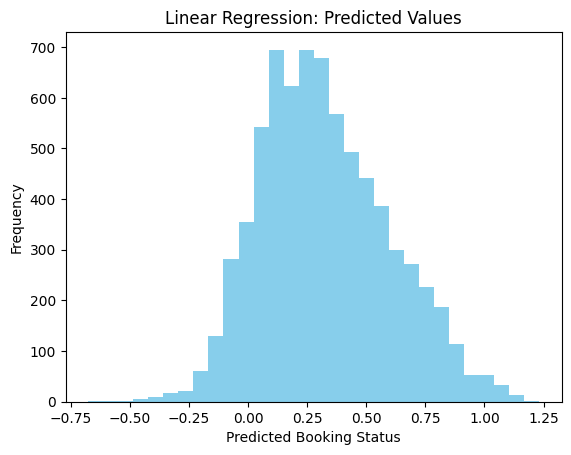

In [87]:
plt.hist(y_pred_lin, bins=30, color='skyblue')
plt.title("Linear Regression: Predicted Values")
plt.xlabel("Predicted Booking Status")
plt.ylabel("Frequency")
plt.show()

**Polynomial Regression**

In [88]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [89]:
lin_poly = LinearRegression()
lin_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_poly.predict(X_test_poly)

In [90]:
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R² Score:", r2_poly)

Polynomial Regression RMSE: 0.35831011741349095
Polynomial Regression R² Score: 0.4172400191819464


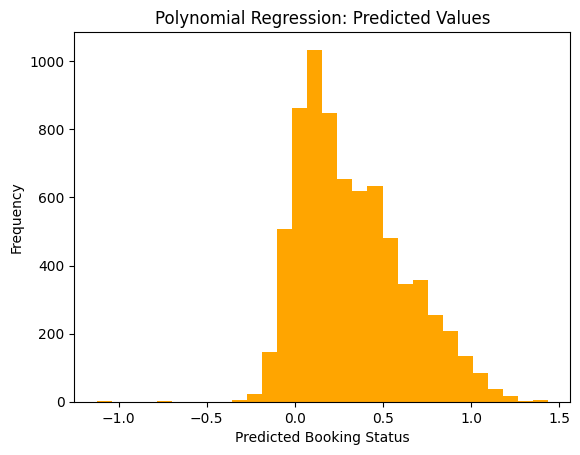

In [91]:
plt.hist(y_pred_poly, bins=30, color='orange')
plt.title("Polynomial Regression: Predicted Values")
plt.xlabel("Predicted Booking Status")
plt.ylabel("Frequency")
plt.show()

 Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [93]:
y_pred_log = log_reg.predict(X_test_scaled)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.8087363924486702
Confusion Matrix:
 [[4386  493]
 [ 895 1483]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4879
           1       0.75      0.62      0.68      2378

    accuracy                           0.81      7257
   macro avg       0.79      0.76      0.77      7257
weighted avg       0.80      0.81      0.80      7257



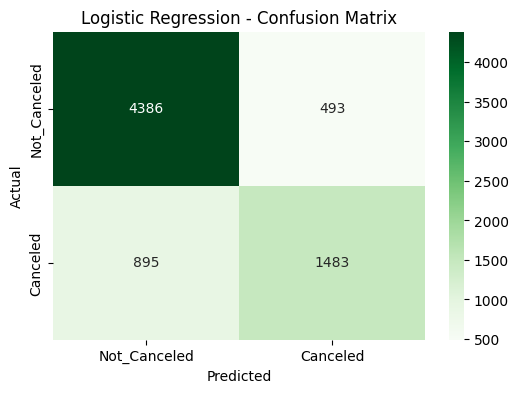

In [96]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not_Canceled', 'Canceled'], yticklabels=['Not_Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()